# EJERCICIO 8.14: OSCILADORES CUANTICOS

Considere la unidimensional, independiente al tiempo ecuación de Schrodinger (e.d., cuadratica) en un potencial armonico $V(x) = V_{0}x^{2}/a^{2}$, donde $V_{0}$ y ${a}$ son constantes.

**a)** Escriba la ecuación de Schrodinger para este problema y conviertalo de una ecuación de segundo orden a una de primer orden, como en en el Ejemplo 8.9, para encontrar las energias del estado fundamental y las dos primeras dos estados excitados para estos ecuaciones cuando $m$ es la masa del electrón, $V_{0} = 50ev$, y $a = 10^{-11}m$. Note que en teoria la función de onda va todo el camino hasta $x = \pm \infty$, pero puedes obtener buenas respuestas usando un intervalo grande pero finito. Intente usando $ x= -10a$ a $+10a$, con la función de onda $ \varphi=0$ en ambos limites. (En efecto, estas colocando el oscilador armonico en una caja con paredes impenetrables.) La función de onda es real en cualquier lugar, entonces no es necesario usar variables complejas, y puedes usar igualmente puntos espaciados para la solucion, no hay necesidad de usar un metodo adaptatico para este problema.  
El oscilador armonico cuantico es conocido por tener estados de energia igualmente espaciados. Compruebe que esto es verdad, a la precisión de tu calculo, para tus respuestas. (Pista: El estado fundamental tiene energia en el rango $100$ a $200$ eV.)

**b)** Ahora modifique el programa para calcular las mismas tres energias para el oscilador anarmónico con $V(x) = V_{0}x^{4}/a^{4}$, con los mismos valores paramétricos.

**c)** Modifique su programa aun mas para calcular las funciones de onda correctamente normalizadas de los osciladores anarmónico para los tres estados y haga una grafica de ellos, todos en los mismos ejes, como una función de $x$ en un rango modesto cerca el origen, diga $x = -5a$ a $x = 5a$.  
Para normalizar las funciones de onda debera calcular el valor de la integral $\int_{-\infty }^{\infty }\left |\psi (x)  \right |^{2}dx$ y entonces rescale $\psi$ apropiadamente para asegurar que el area bajo el cuadrado de las funciones de onda es 1. La regla trapezoidal o la regla de Simpson le dará un valor razonable para la integral. Sin embargo, tenga en cuenta que puede encontrar algunos valores muy grandes al final de la matriz que contiene la función de onda. ¿De dónde vienen estos grandes valores? ¿Son reales o espurios?.  
Una manera simple de lidiar con los valores grandes es hacer uso del hecho de que el sistema es simétrico con respecto a su punto medio y calcular la integral de la función de onda solo en la mitad izquierda del sistema, luego duplicar el resultado. Esto claramente pierde los grandes valores.

## Solución a)

In [16]:
from numpy import array, arange

# Constantes
m = 9.1094e-31      # Masa del electron
hbar = 1.0546e-34   # Constante de Planck sobre 2*pi
e = 1.6022e-19      # Carga del electron
a = 1e-11
x_0 = -10*a
x_f = 10*a
N = 1000
h = (x_f-x_0)/N
V0 = 50*e


# Funcion Potencial
def V(x):
    return V0*x**2/a**2

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calcular la longitud de onda para una energia particular
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    for x in arange(x_0,x_f,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        
    return r[0]

# Programa principal para encontrar la energia usando el metodo de la secante
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_0 =",E2/e,"eV")

E1 = 400*e
E2 = 600*e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_1 =",E2/e,"eV")

E1 = 900*e
E2 = 1100*e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_2 =",E2/e,"eV")

E_0 = 138.02397130603683 eV
E_1 = 690.1198621045553 eV
E_2 = 1242.21575969158 eV


## Solución b)

In [17]:
from numpy import array, arange

# Constantes
m = 9.1094e-31      # Masa del electron
hbar = 1.0546e-34   # Constante de Planck sobre 2*pi
e = 1.6022e-19      # Carga del electron
a = 1e-11
x_0 = -10*a
x_f = 10*a
N = 1000
h = (x_f-x_0)/N
V0 = 50*e


# Funcion Potencial
def V(x):
    return V0*x**4/a**4

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calcular la longitud de onda para una energia particular
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    for x in arange(x_0,x_f,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        
    return r[0]

# Programa principal para encontrar la energia usando el metodo de la secante
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_0 =",E2/e,"eV")

E1 = 400*e
E2 = 600*e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_1 =",E2/e,"eV")

E1 = 900*e
E2 = 1100*e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("E_2 =",E2/e,"eV")

E_0 = 205.30690346934932 eV
E_1 = 735.6912470402102 eV
E_2 = 1443.5694214021203 eV


## Solución c)

E_0 =  205.3069033111151 eV
E_1 =  735.6912429436632 eV
E_2 =  3148.6085707519233 eV


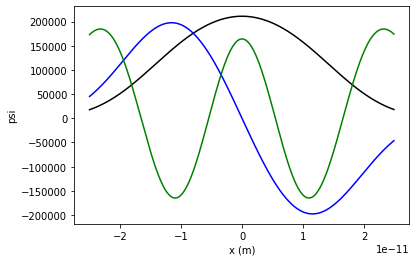

In [29]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel

# Constantes
m = 9.1094e-31      # Masa del electron
hbar = 1.0546e-34   # Constante de Planck sobre 2*pi
e = 1.6022e-19      # Carga del electron
a = 1e-11
x_0 = -5*a
x_f = 5*a
N = 1000
h = (x_f-x_0)/N
V0 = 50*e


# Funcion Potencial
def V(x):
    return V0*x**4/a**4

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calcular la longitud de onda para una energia particular
def psi(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    wavefunction = []
    
    for x in arange(x_0,x_f,h):
        wavefunction.append(r[0])
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        
    return array(wavefunction, float)

# Programa principal para encontrar la energia usando el metodo de la secante
def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    psi2 = wavefunction[N - 1]
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)

    # Normalizando la función de onda usando la regla de Simpson
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
            4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)

# Las primeras tres energias de un oscialdor anarmonico
E0, psi0 = secant_root(0, e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')

# Graficar las funciones de onda
xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'k')
plot(xpoints[x_range], psi1[x_range], 'b')
plot(xpoints[x_range], psi2[x_range], 'g')
xlabel('x (m)')
ylabel('psi')
show()